In [1]:
import numpy as np
import torch
from autoencoder import DummyEncoder
import matplotlib.pyplot as plt


In [13]:
checkpoint_path = './model_checkpoints/model_000000120000.pt'
input_img = np.zeros((2, 32, 32))
model = DummyEncoder(grid=None, input_img=input_img)
model.load_state_dict(torch.load(checkpoint_path))

input img shape:  (2, 32, 32)
Activations shaep:  torch.Size([1, 1, 32, 32])


<All keys matched successfully>

In [14]:
model.cc_activations.shape

torch.Size([1, 1, 32, 32])

In [35]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='None')
    
show(model.cc_activations[0].detach())

NameError: name 'model' is not defined

In [26]:
iw, ih = (3,3)
df = 1
x = torch.ones((iw,ih))
y = torch.zeros((iw*df+1,ih*df+1))
y[df//2::df, df//2::df] = x
print(y)

RuntimeError: The expanded size of the tensor (4) must match the existing size (3) at non-singleton dimension 1.  Target sizes: [4, 4].  Tensor sizes: [3, 3]

tensor([[1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1.]])


In [13]:
np.arange(10)[1::2]

array([1, 3, 5, 7, 9])

599
torch.Size([1, 1, 543, 543])


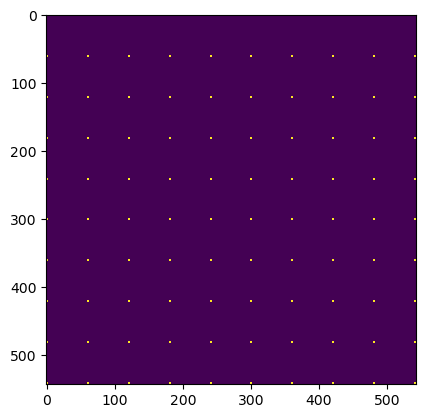

In [54]:
field_img = torch.ones(1, 1, 10,10)
kernel = torch.ones(1, 1, 3, 3)
stride = 60
out = torch.conv_transpose2d(field_img, kernel, bias=None, stride=stride)
print(10*stride - 1)
print(out.shape)
show(out[0])

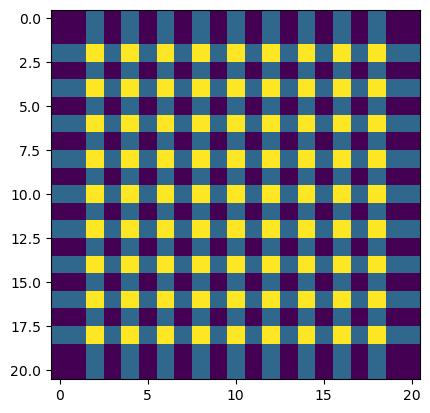

In [43]:
print(out[0].shape)

torch.Size([1, 21, 21])


In [56]:
# How to calculate the size of a strided conv2d_transpose:
# https://stackoverflow.com/questions/63687719/filter-size-and-stride-when-upsampling-image-using-conv2d-transpose